# Part 1 - The basics

Welcome to Part 1! 

Here, we'll learn the foundations of neural networks, and implement a perceptron - the simplest neural network. But first, let's define some functions that will help us plot and visualize the data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s=25, color='blue', edgecolor='k')
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s=25, color='red', edgecolor='k')
    
def plot_line(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

Without further ado, let's begin!

## Index

- [AI vs ML vs DL](#ai-ml-dl)
- [What is a neural network?](#neural-network)
- [Prediction](#prediction)
- [Compare](#compare)
- [Learn](#learn)
- [Full implementation in a real case](#full-implementation)

## AI vs ML vs DL <a id='ai-ml-dl'></a>

Before we dive deep into neural networks, we need some context.

### Artificial Intelligence
All starts here. Artificial Intelligence (AI) is the broader concept of machines being able to carry out tasks in a way that we would consider "smart".

### Machine Learning
Machine Learning (ML) is a subfield of Computer Science dedicated to the study and development of machines that can learn to perform tasks for which they were not explicitly programmed. It's based on the idea that we should really just be able to give machines access to data and let them learn for themselves.

There are 2 main types of machine learning:
- **Supervised machine learning**: is the direct imitation of pattern between 2 datasets. It is always attempting to take an input dataset and transform it into an output dataset (using the movies you like to predict the movies you may like).
- **Unsupervised machine learning**: it shares a property in common with supervised learning. It transforms one dataset into another. However, the dataset that it transforms into is not previously known or understood (clustering a dataset into groups is a type of unsupervised learning).

### Deep Learning
Deep Learning (DL) is a subset of methods in the Machine Learning toolbox, primarily leveraging Artificial Neural Networks (ANN), which are a class of algorithms inspired by the function of the human brain.

You can think of AI, ML, and DL like the following:

![AI vs ML vs DL](img/part1/1.png)

## What is a neural network? <a id='neural-network'></a>

Neural networks are at the heart of deep learning, they are algorithms inspired by the function of the brain and designed to mimic our own decision making.

One way we can leverage the power of neural networks is in prediction. For example, we can predict if a student will be admitted to a graduate program based on certain features (grades and test score). A neural network can do its job with the help of parameters called weights, which you can think of as knobs that will process the input data that comes into the network, and transformed it into a prediction.

Let's define the problem that we'll solve using neural networks:  
Suppose that we are the admissions office at a university and our job is to accept or reject students. So, in order to evaluate students, we have 2 pieces of information: the results of a test and their grades in school.

Now, let's take a look at some sample students (the data is normalized for better predictions), the blue points correspond to students that got accepted, and the red points to students that got rejected:

<function matplotlib.pyplot.show>

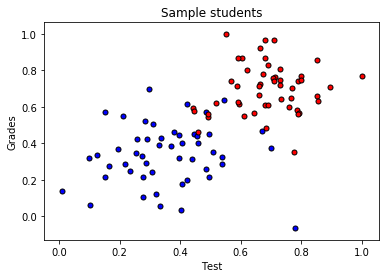

In [2]:
data = pd.read_csv('data/part1.csv', header=None) # 100 rows Ã— 3 columns
X = np.array(data[[0, 1]])
y = np.array(data[2])
plot_points(X, y)
plt.title("Sample students")
plt.xlabel('Test')
plt.ylabel('Grades')
plt.show

If you take a closer look, it seems that this data can be nicely separated by a line which is this line over here:

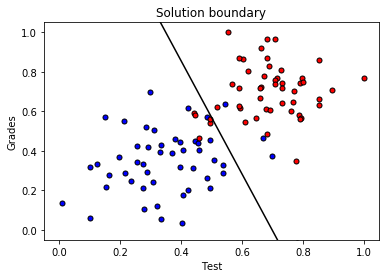

In [3]:
plot_points(X, y)
plt.title("Solution boundary")
plt.xlabel('Test')
plt.ylabel('Grades')
plot_line(-2.86, 2.0, 'black')
plt.show()

And it seems that most students over the line get rejected, and most students under the line get accepted. So this line is going to be our model.

It's worth noting that our model makes a couple of mistakes since there are a few blue points that are over the line and a few red points that are under the line, but for simplicity, we're not going to care about those.

Finally, we'll say that it's safe to predict that if a point is under the line the student gets accepted and if it's over the line the student gets rejected.

But, how do we find that line? We'll do it with the help of a perceptron.

###  Perceptron

Perceptrons are the building blocks of neural networks and are encodings of equations into a small graph. A perceptron is the simplest neural network and looks like this:

![Perceptron](img/part1/2.png)

It takes some inputs $x_1$ and $x_2$, and those inputs get to multiply by the weights $W_1$ and $W_2$, and that result is passed through an activation function (the activation function of a node is the function that defines the output of that node given a set of inputs) which gives a probability.

Why are these objects called neural networks? Because perceptrons kinda look like neurons in the brain. In similar way neurons in the brain take inputs (nervous impulses) coming from the dendrites, then the neurons do something with the nervous impulses and finally, they decide if they output a nervous impulse or not through the axon.

We can combine perceptrons so that the output of one becomes the input of another one, this is what forms a multi-layer perceptron or a neural network.

Now, with equation will we encode into the perceptron? Since we are looking for the line above, we need a linear equation, like the following:

$$
W_1 x_1 + W_2 x_2 - 10 = 0
$$

Where $x_1$ correspond to the test and $x_2$ to the grades, and $-10$ to a $bias$, like:

$$
W_1*Test + W_2*Score - b
$$

When a new student comes in, we replace his test and score values into the equation and we check the score. The score will tell us if the student gets accepted o rejected.

But there's a problem, we don't know the correct values for the weights $W_1$ and $W_2$. In order to find those values, a neural network will have to follow these steps:
- **Prediction**: the first step consists in gather the information of a student in our sample data, send it through the neural network, and make a prediction of the probability that the student will get accepted.
- **Compare**: the second step is to compare the prediction with the pattern we care about (whether if the student got accepted). In this step, we will find some discrepancies about what we predict and the target value, and since we want our neural network to be accurate, this takes us to the next step.
- **Learn**: This step adjusts the weights $W_1$ and $W_2$ by studying both how much the model missed and what the input data was at the time of prediction.

The more data we have to train our neural network, the better predictions will make. That's why we'll iterate a lot of times through our sample data.

## Prediction <a id='prediction'></a>

It's time to introduce some math. For the prediction part, we need the following functions:

- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

Which in code looks like:

In [4]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.matmul(features,weights) + bias)

Suppose we start with weights $W_1 = 0.25$, $W_2 = 0.12$ and $b = 1$. Next, we take the first student sample data:

In [5]:
X[0]

array([ 0.78051 , -0.063669])

So we have $x_1 = 0.78051$ and $x_2 = -0.063669$. Now we calculate our prediction (a value between 0 and 1) like:

In [6]:
weights = [0.25, 0.12]
prediction = output_formula(X[0], weights, 1)
prediction

0.76629135433742024

The closer to 1 the prediction is, the greater the probability that the student will be accepted.

## Compare <a id='compare'></a>

With our prediction calculated, we have to compare it with the actual value for the first student:

In [7]:
y[0] # 1 if the student got accepted, 0 otherwise.

1

In this step, we have to define a measurement of how much our prediction "missed". This measurement is our error function:

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

As you can see, this functions depends on the target value and our predicted value. Then, the code for the error is:

In [8]:
# Error (log-loss) formula
def error_formula(y, output):
    return (-y * np.log(output)) - ((1 - y) * np.log(1 - output))

In the case of the first student we have:

In [9]:
error = error_formula(y[0], prediction)
error

0.26619282341652073

## Learn <a id='learn'></a>

In order to our neural network to make better predictions, it has to adjust its weights, and it does that by using a technique called *Gradient descent*, an algorithm used to perform optimization and for finding the minimum of a function. This process takes steps proportional to the negative of the gradient of the error function at a current point.

The "learning" part takes our error and tells each weight how it can change to reduce it. This way, at the end we'll have new weights that will make better predictions.

The following formulas will help us in this part:

- Function that updates the weights and bias

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

The $a$ constant is called the learning rate and is used to decrease the magnitude of the increments to our weights, in order to take small steps.

The functions in code are the following:

In [10]:
# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    weights += learnrate*(y - output)*x
    bias += learnrate*(y - output)
    return weights, bias

Following with our first student:

In [11]:
new_weights, b = update_weights(X[0], y[0], weights, 1, 0.01)

print('Original weights:', weights)
print('New weights:', new_weights)

Original weights: [0.25, 0.12]
New weights: [ 0.25182412  0.1198512 ]


## Full implementation in a real case <a id='full-implementation'></a>

Nothing better than putting all of the pieces together.

Let's iterate a lot of times through all of the sample data and perform the 3 steps described above. Each iteration through all of the sample data will be called an *epoch*.

Let's define the training function that will help us to do that. It will also plot the data, and some of the boundary lines obtained as we run the algorithm:

In [12]:
np.random.seed(44) # Use to same seed to make debugging easier

epochs = 100
learnrate = 0.01

original_weights = []
final_weights = []
final_bias = 0

def train(features, targets, epochs, learnrate, graph_lines=False):
    global original_weights
    global final_weights
    global final_bias
    
    errors = []
    last_loss = None
    n_records, n_features = features.shape
    weights = np.random.normal(scale=1/n_features**0.5, size=n_features)
    original_weights = list(weights)
    bias = 0
    
    # For each iteration through all of the sample data
    for e in range(epochs):
        # Iterate each student data
        for x, y in zip(features, targets):
            weights, bias = update_weights(x, y, weights, bias, learnrate)
            
        # Printing out the error after iterate through all of the students
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        
        if graph_lines and e % (epochs / 100) == 0:
            plot_line(-weights[0]/weights[1], -bias/weights[1])
    
    # Plotting the solution boundary
    plt.title("Solution boundary")
    plot_line(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.ylabel('Error')
    plt.xlabel('Number of epochs')
    plt.plot(errors)
    plt.show()
    
    final_weights = weights
    final_bias = bias

### Time to train the neural network!

Training is the process that looks for the parameters a neural network should have on its edges (weights) in order to model our data well.

When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy of our model.
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.


========== Epoch 0 ==========
Train loss:  0.713584519538
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  0.622583521045
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  0.554874408367
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  0.501606141872
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.459333464186
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  0.425255434335
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.397346157167
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.374146976524
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.354599733682
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.337927365888
Accuracy:  0.94


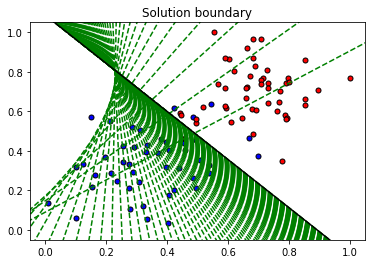

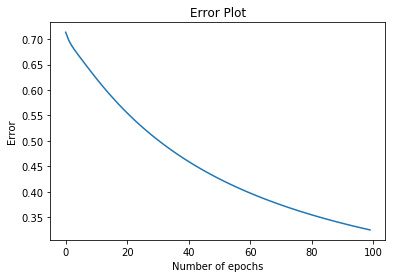

In [13]:
train(X, y, epochs, learnrate, True)

In [14]:
print('Original weights:', original_weights)
print('Original bias:', 0)
print('\nFinal weights:', final_weights)
print('Final bias:', final_bias)

Original weights: [-0.53076475663005063, 0.93080519076830948]
Original bias: 0

Final weights: [-3.67329516 -3.02049558]
Final bias: 3.28035458862


Beautiful, isn't it? We implemented a simple neural network that allowed us to find the line that best separates our sample data and now allows to predict if, given a new student, he will get accepted or rejected.

Although this example is too simple, the purpose is to introduce to the foundations that will allow you to create more complex neural networks. Not worry if you didn't understand the process, it's a lot of information involved, so make sure to read again this part until you feel comfortable with the whole process.

When you're ready, take a look at the second part where we'll dive deeper into complex neural networks.

See you later!

# Feedback

Please open a new issue on GitHub for any corrections or feedback.